In [1]:
import pandas as pd
import numpy as np
import json
import os
from PIL import Image
import re

In [2]:
%cd C:/Users\na062/Desktop/sw_pro/video_dataset

C:\Users\na062\Desktop\sw_pro\video_dataset


In [3]:
def MatchingImageAndLabel(image_id,dataframe):
    dirpath="./image/Train/"
    if sum(dataframe['image_id']==image_id[:-4])==1:
        try: 
            Image.open(dirpath+image_id)
        except:
            return False,False
        else:
            return Image.open(dirpath+image_id), dataframe[dataframe['image_id']==image_id[:-4]].captions.values[0]
        
    
    return False,False

1. 문제점: json파일에서 한글 깨짐 현상 발생

 => 이러한 문제가 발생하는 이유:맥북과 window간의 encode 다름

In [4]:
def DataRandomSampling(dirlist,data):
    captions = []
    count=0
    fail =[]
    
    for image_id in dirlist:
        image,caption= MatchingImageAndLabel(image_id,data)
        if caption: # caption 있고 n보다 작으면 
            count+=1
            captions.append({'image':f'image{count}.jpg','label':caption})  
            image.save(f'./train/image{count}.jpg') # 이미지 저장 
        elif caption==False or image==False:
            fail.append(image_id)
        if count%2000==0:
            print("{}개 저장 성공".format(count))
            
        if len(fail)>99 and len(fail)%100==0:
            print("fail",len(fail))
    return captions, fail

In [5]:
def CaptionSave(captions,Name):
    with open(Name, 'w') as file:
        json.dump(captions, file)

In [6]:
with open('total_captions_dataset.json','r',encoding='utf-8') as f:
    data = json.load(f)
    data_id = [re.sub(b'\xe1\x84\x80\xe1\x85\xa9'.decode(),'고',json.dumps(row['image_id'],ensure_ascii=False))[1:-1] for row in data]

In [7]:
Data = pd.read_json('total_captions_dataset.json',encoding='utf-8')
Data['image_id']=data_id
dirpath="./image/Train/"
List = os.listdir('./image/Train')

In [8]:
captions, fail = DataRandomSampling(List,Data)

2000개 저장 성공
4000개 저장 성공
6000개 저장 성공
8000개 저장 성공
10000개 저장 성공
12000개 저장 성공
14000개 저장 성공
16000개 저장 성공
18000개 저장 성공
20000개 저장 성공
22000개 저장 성공
24000개 저장 성공
26000개 저장 성공
28000개 저장 성공
30000개 저장 성공
32000개 저장 성공
34000개 저장 성공
36000개 저장 성공
38000개 저장 성공
40000개 저장 성공
42000개 저장 성공
44000개 저장 성공
46000개 저장 성공
48000개 저장 성공
50000개 저장 성공
52000개 저장 성공
54000개 저장 성공
56000개 저장 성공
58000개 저장 성공
60000개 저장 성공
62000개 저장 성공
64000개 저장 성공
66000개 저장 성공
68000개 저장 성공


In [9]:
pd.DataFrame(captions)

,image,label
0,image1.jpg,A male senior is wearing white short sleeve to...
1,image2.jpg,A female adult is wearing white short sleeve t...
2,image3.jpg,A female senior is wearing white long sleeve t...
3,image4.jpg,A female senior is wearing black short sleeve ...
4,image5.jpg,A male senior is wearing grey short sleeve top...
...,...,...
68007,image68008.jpg,A male adult is wearing white short sleeve top...
68008,image68009.jpg,A male senior is wearing red long sleeve top a...
68009,image68010.jpg,A female adult is wearing grey long sleeve top...
68010,image68011.jpg,A male senior is wearing black long sleeve top...


In [10]:
CaptionSave(captions,'caption.json')

### 여기부터는 그냥 확인용 

In [18]:
with open('caption.json','r',encoding='utf-8') as f:
    data = json.load(f)
    captions = [re.sub(b'\xe1\x84\x80\xe1\x85\xa9'.decode(),'고',json.dumps(row['image'],ensure_ascii=False))[1:-1] for row in data]
    

A female adult is wearing grey long sleeve top, white long pants and a bag.


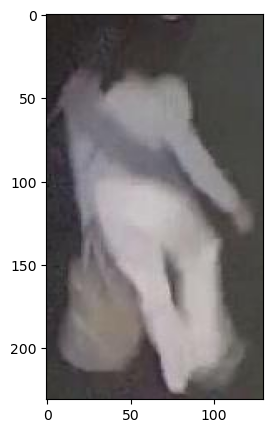

In [22]:
import matplotlib.pyplot as plt
num=-3
print(data[num]['label'])
plt.figure(figsize=(5,5))
plt.imshow(Image.open('./train/'+captions[num]))

In [12]:
len(fail)

0